In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Ray Mcdonald_Trans 1.csv"
csv_path2 = "../Player Tweets/Ray Mcdonald_Trans 2.csv"
csv_path3 = "../Player Tweets/Ray Mcdonald_Trans 3.csv"
csv_path4 = "../Player Tweets/Ray Mcdonald_Trans 4.csv"

#Establish pd dataframe for each file
raymcdonald1 = pd.read_csv(csv_path1, sep=";")
raymcdonald2 = pd.read_csv(csv_path2, sep=";", error_bad_lines=False)
raymcdonald3 = pd.read_csv(csv_path3, sep=";", error_bad_lines=False)
raymcdonald4 = pd.read_csv(csv_path4, sep=";", error_bad_lines=False)

#concatenate data frames *kennybritt4* not working
raymcdonald_master = pd.concat([raymcdonald1, raymcdonald2, raymcdonald3, raymcdonald4])
raymcdonald_master

b'Skipping line 869: expected 10 fields, saw 11\nSkipping line 1026: expected 10 fields, saw 11\nSkipping line 6197: expected 10 fields, saw 11\n'
b'Skipping line 151: expected 10 fields, saw 11\n'
b'Skipping line 21671: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2014-12-23 17:39,0,0,Aldon Smith: I wasn't drinking: 49ers lineback...,NaN,NaN,NaN,5.475370e+17,https://twitter.com/US_NW_Sports/status/547537...
1,NaN,2014-12-23 17:34,0,0,Aldon Smith: ‘I didn’t drink’ at Ray McDonald’...,NaN,NaN,# #,5.475358e+17,https://twitter.com/NFL_Links/status/547535842...
2,NaN,2014-12-23 17:30,19,13,Details released in Ray McDonald sexual assaul...,NaN,NaN,NaN,5.475347e+17,https://twitter.com/TIME/status/54753467706693...
3,NaN,2014-12-23 17:26,0,0,49ers' Ray McDonald faces sexual-assault inves...,NaN,NaN,# # #,5.475337e+17,https://twitter.com/LasAngelesTimez/status/547...
4,NaN,2014-12-23 17:23,0,0,# 49ers Aldon Smith: 'I didn't drink one thing...,NaN,NaN,#,5.475329e+17,https://twitter.com/KeithRobinson0/status/5475...
5,NaN,2014-12-23 17:18,0,0,49ers' Ray McDonald faces sexual-assault inves...,NaN,NaN,# # #,5.475317e+17,https://twitter.com/LasAngelesTimez/status/547...
6,NaN,2014-12-23 17:17,0,0,49ers LB Aldon Smith denies that he was drinki...,NaN,NaN,NaN,5.475314e+17,https://twitter.com/MusikFan4Life/status/54753...
7,NaN,2014-12-23 17:07,0,0,# Sports fans: Aldon Smith of San Francisco 49...,NaN,NaN,#,5.475291e+17,https://twitter.com/macarrascojr/status/547529...
8,NaN,2014-12-23 17:03,0,0,Aldon Smith strongly denies drinking at Ray Mc...,NaN,NaN,NaN,5.475279e+17,https://twitter.com/SBNationNFL/status/5475278...
9,NaN,2014-12-23 17:02,0,0,Aldon Smith denies drinking with ex-49er Ray M...,NaN,NaN,# #,5.475276e+17,https://twitter.com/Sports_cReep/status/547527...


In [2]:
#fillna's with text to fix error
raymcdonald_master["text"].fillna("text", inplace=True)
raymcdonald_master.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2014-12-23 17:39,0,0,Aldon Smith: I wasn't drinking: 49ers lineback...,NaN,NaN,NaN,5.475370e+17,https://twitter.com/US_NW_Sports/status/547537...
1,NaN,2014-12-23 17:34,0,0,Aldon Smith: ‘I didn’t drink’ at Ray McDonald’...,NaN,NaN,# #,5.475358e+17,https://twitter.com/NFL_Links/status/547535842...
2,NaN,2014-12-23 17:30,19,13,Details released in Ray McDonald sexual assaul...,NaN,NaN,NaN,5.475347e+17,https://twitter.com/TIME/status/54753467706693...
3,NaN,2014-12-23 17:26,0,0,49ers' Ray McDonald faces sexual-assault inves...,NaN,NaN,# # #,5.475337e+17,https://twitter.com/LasAngelesTimez/status/547...
4,NaN,2014-12-23 17:23,0,0,# 49ers Aldon Smith: 'I didn't drink one thing...,NaN,NaN,#,5.475329e+17,https://twitter.com/KeithRobinson0/status/5475...


In [3]:
#create list of sentiment scores associated with tweets about relevant player

raymcdonald_sent = []

tweets = raymcdonald_master["text"]

for index,tweet in raymcdonald_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    raymcdonald_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
raymcdonald_sent



[{'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-12-23 17:39'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-12-23 17:34'},
 {'Compound': -0.5859,
  'Negative': 0.678,
  'Neutral': 0.322,
  'Positive': 0.0,
  'date': '2014-12-23 17:30'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-12-23 17:26'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-12-23 17:23'},
 {'Compound': 0.0,
  'Negative': 1.0,
  'Neutral': 0.0,
  'Positive': 0.0,
  'date': '2014-12-23 17:18'},
 {'Compound': -0.4215,
  'Negative': 0.887,
  'Neutral': 0.113,
  'Positive': 0.0,
  'date': '2014-12-23 17:17'},
 {'Compound': -0.4215,
  'Negative': 0.859,
  'Neutral': 0.141,
  'Positive': 0.0,
  'date': '2014-12-23 17:07'},
 {'Compound': -0.1779,
  'Negative': 0.647,
  'Neutral': 0.201,
  'Positive': 0.151,
  'date': '2014-12-23 17:03'},
 {'Compound'

In [4]:
# Convert player sentiments to DataFrame
RM_pd = pd.DataFrame.from_dict(raymcdonald_sent)
RM_pd.head()

,Compound,Negative,Neutral,Positive,date
0,0.0000,1.000,0.000,0.0,2014-12-23 17:39
1,0.0000,1.000,0.000,0.0,2014-12-23 17:34
2,-0.5859,0.678,0.322,0.0,2014-12-23 17:30
3,0.0000,1.000,0.000,0.0,2014-12-23 17:26
4,0.0000,1.000,0.000,0.0,2014-12-23 17:23


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(raymcdonald_master, RM_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2014-12-23 17:39,0,0,Aldon Smith: I wasn't drinking: 49ers lineback...,NaN,NaN,NaN,5.475370e+17,https://twitter.com/US_NW_Sports/status/547537...,0.0000,1.000,0.000,0.0
1,NaN,2014-12-23 17:34,0,0,Aldon Smith: ‘I didn’t drink’ at Ray McDonald’...,NaN,NaN,# #,5.475358e+17,https://twitter.com/NFL_Links/status/547535842...,0.0000,1.000,0.000,0.0
2,NaN,2014-12-23 17:30,19,13,Details released in Ray McDonald sexual assaul...,NaN,NaN,NaN,5.475347e+17,https://twitter.com/TIME/status/54753467706693...,-0.5859,0.678,0.322,0.0
3,NaN,2014-12-23 17:26,0,0,49ers' Ray McDonald faces sexual-assault inves...,NaN,NaN,# # #,5.475337e+17,https://twitter.com/LasAngelesTimez/status/547...,0.0000,1.000,0.000,0.0
4,NaN,2014-12-23 17:23,0,0,# 49ers Aldon Smith: 'I didn't drink one thing...,NaN,NaN,#,5.475329e+17,https://twitter.com/KeithRobinson0/status/5475...,0.0000,1.000,0.000,0.0


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2014-12-23 17:39,0,0,Aldon Smith: I wasn't drinking: 49ers lineback...,NaN,NaN,NaN,5.475370e+17,https://twitter.com/US_NW_Sports/status/547537...,0.0000,1.000,0.000,0.0,2014-12-23
1,NaN,2014-12-23 17:34,0,0,Aldon Smith: ‘I didn’t drink’ at Ray McDonald’...,NaN,NaN,# #,5.475358e+17,https://twitter.com/NFL_Links/status/547535842...,0.0000,1.000,0.000,0.0,2014-12-23
2,NaN,2014-12-23 17:30,19,13,Details released in Ray McDonald sexual assaul...,NaN,NaN,NaN,5.475347e+17,https://twitter.com/TIME/status/54753467706693...,-0.5859,0.678,0.322,0.0,2014-12-23
3,NaN,2014-12-23 17:26,0,0,49ers' Ray McDonald faces sexual-assault inves...,NaN,NaN,# # #,5.475337e+17,https://twitter.com/LasAngelesTimez/status/547...,0.0000,1.000,0.000,0.0,2014-12-23
4,NaN,2014-12-23 17:23,0,0,# 49ers Aldon Smith: 'I didn't drink one thing...,NaN,NaN,#,5.475329e+17,https://twitter.com/KeithRobinson0/status/5475...,0.0000,1.000,0.000,0.0,2014-12-23


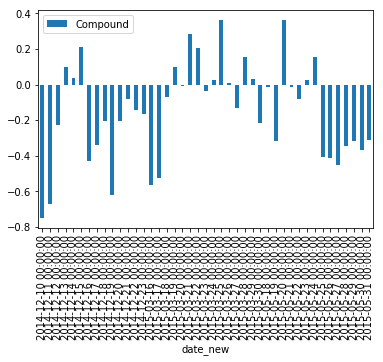

In [7]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('raymcdonald.png')
plt.show()